In [241]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Nieuwe sectie

In [242]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [243]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

In [244]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [362]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded["adult.csv"]))

Saving adult.csv to adult (4).csv


In [363]:
import pandas as pd

# Load the raw data
df_raw = pd.read_csv(abspath_curr + "adult.csv",
                     header=0)


# Make a copy of df_raw
df = df_raw.copy(deep=True)

# Get the name of the target
target = 'sex'

In [364]:
df_raw.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [365]:
# rename the columns
df.rename(columns={"capital.gain": "capital gain", 'capital.loss': 'capital loss', 'native.country': 'country','hours.per.week': 'hours per week','marital.status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [366]:
# code will replace the special character to nan and then drop the columns 
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
df['country'] = df['country'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

In [367]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [ ]:
#df = df.dropna()

In [368]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [369]:
#gender
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)

In [370]:
#race
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

In [371]:
#marital
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [372]:
#workclass
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [373]:
#education
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

In [374]:
#occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

In [375]:
#relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [376]:
df.drop(['education.num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [574]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                                     train_size=0.4, 
                                     random_state=random_seed)


# Reset the index
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)
# Print the dimension of df_train

In [575]:
# Print the dimension of df
pd.DataFrame([[df.shape[0], df.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,30162,8


In [576]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,12064,8


In [580]:
#count the amount of women that earns more than $50k, >50k = 1
df_train.loc[(df_train['sex'] == 1) , 'income'].value_counts()

0    3515
1     447
Name: income, dtype: int64

In [539]:
df_train.loc[(df_test['sex'] == 0) , 'income'].value_counts()

0    5640
1    2586
Name: income, dtype: int64

In [581]:
#Get the feature matrix

X_df = df_train[np.setdiff1d(df_train.columns, [target])].values

# Get the target vector
y_df = df_train[target].values

In [582]:
# reindex the column name
df_x_y = df_train[df_train.columns].values

In [583]:
df_xt_yt = pd.DataFrame(df_x_y)

In [585]:
# count the number of female(1) and male(0) 
value_counts = pd.Series(y_df).value_counts(ascending=True)
value_counts

1    3962
0    8102
dtype: int64

In [586]:
#determine the minor class
minor_class = value_counts.index[0]
minor_class

1

In [587]:
# Get the training feature matrix of the minority class
X_minor_df = X_df[np.where(y_df== minor_class)]

# Get the training target vector of the minority class
y_minor_df = y_df[np.where(y_df == minor_class)]



In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + 'result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [589]:
# Set the number of features
n_features = X_df.shape[1]

# Set the coding size, which is the dimension of the noise used as input for the generator
coding_size = n_features // 2

# Build the generator
generator = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[coding_size]),
    keras.layers.Dense(200, activation='selu'),
    keras.layers.Dense(300, activation='selu'),
    keras.layers.Dense(400, activation='selu'),
    keras.layers.Dense(500, activation='selu'),
    keras.layers.Dense(n_features, activation='sigmoid')
])

# Build the discriminator
discriminator = keras.models.Sequential([
    keras.layers.Dense(n_features),
    keras.layers.Dense(500, activation='selu'),
    keras.layers.Dense(400, activation='selu'),
    keras.layers.Dense(300, activation='selu'),
    keras.layers.Dense(200, activation='selu'),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Build a gan
gan = keras.models.Sequential([generator, discriminator])

# Get the summary
gan.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_45 (Sequential)  (None, 7)                 405307    
                                                                 
 sequential_46 (Sequential)  (None, 1)                 405157    
                                                                 
Total params: 810,464
Trainable params: 810,464
Non-trainable params: 0
_________________________________________________________________


In [590]:
# Compile the discriminator
discriminator.compile(loss='binary_crossentropy',
                      optimizer=keras.optimizers.Adam(learning_rate=10 ** -4))
# Freeze the discriminator
discriminator.trainable = False

# Compile the generator
gan.compile(loss='binary_crossentropy',
            optimizer=keras.optimizers.Adam(learning_rate=10 ** -4))

In [591]:
# Get the generator and discriminator
generator, discriminator = gan.layers

# Get the indices of the training data of the minority class
idxs_minor_df = np.array(range(X_minor_df.shape[0]))

# The batch size
batch_size = 32

# Get the number of minibatches
n_batch = len(idxs_minor_df) // batch_size

# The number of maximum epoch
max_iter = 10

# For each epoch
for _ in range(max_iter):
    # Shuffle the data
    np.random.RandomState(seed=random_seed).shuffle(idxs_minor_df)
    
    # For each minibatch
    for i in range(n_batch):
        # Get the first and last index (exclusive) of the minibatch
        first_idx = i * batch_size
        last_idx = min((i + 1) * batch_size, len(idxs_minor_df))
                                
        # Get the minibatch
        mb = idxs_minor_df[first_idx : last_idx]

        # Get the real feature matrix
        real_features = X_minor_df[mb, :]


        # Get the noise
        noise = tf.random.normal(shape=[len(mb), coding_size], seed=random_seed)

        # Get the gen feature matrix
        gen_features = generator(noise)

        # Cominbe the generated and real feature matrix
        gen_real_features = tf.concat([gen_features, real_features], axis=0)

        # Get the target vector
        y = tf.constant([[0.]] * len(mb) + [[1.]] * len(mb))

        # Unfreeze the discriminator
        discriminator.trainable = True

        # Train the discriminator
        discriminator.train_on_batch(gen_real_features, y)

        # Get the noise
        noise = tf.random.normal(shape=[len(mb), coding_size], seed=random_seed)

        # Get the target
        y = tf.constant([[1.]] * len(mb))

        # Freeze the discriminator
        discriminator.trainable = False

        # Train the generator
        gan.train_on_batch(noise, y)

    # Save the gan
    gan.save(abspath_curr + 'result/model/model.h5')

In [ ]:
# Load the model
model = keras.models.load_model(abspath_curr + 'result/model/model.h5')

In [593]:
# Get the generator
generator = gan.layers[0]

# Get the difference between number of majority class and minority class
n_class_diff = X_df.shape[0] - 2 * X_minor_df.shape[0]

# Initialize the generated data
gen_data = np.zeros((n_class_diff, X_minor_df.shape[1] + 1))


for i in range(n_class_diff):
    # Get the noise
    noise = tf.random.normal(shape=[1, coding_size], seed=random_seed)

    # Get the generated features
    gen_features = generator(noise)

    # Update the generated data
    gen_data[i, :-1], gen_data[i, -1] = gen_features, minor_class

In [594]:
#convert the generated data to a dataframe
df_xg_yg = pd.DataFrame(gen_data)

In [596]:
float_col = df_xg_yg.select_dtypes(include=['float64']) # This will select float columns only

for col in float_col.columns.values:
  df_xg_yg[col] = df_xg_yg[col].astype('int64')


In [597]:
# Get the target vector of generated data (income)
X_df_xg_yg = df_xg_yg[np.setdiff1d(df_xg_yg.columns, [7])].values
# Get the target vectorof generated data
y_df_xg_yg = df_xg_yg[7].values

# Get the target vector of generated data(sex)
X_df_xg_yg2 = df_xg_yg[np.setdiff1d(df_xg_yg.columns, [6])].values

# Get the target vectorof generated data
y_df_xg_yg2 = df_xg_yg[6].values

In [598]:
#count the amount of the genereted data where individual earns more or less than 50k / as you see, all individual in the genereted data make over 50k
value_counts = pd.Series(y_df_xg_yg).value_counts(ascending=True)
value_counts

1    4140
dtype: int64

In [599]:
#determine  how many datapoints are genereted for the female and male class/ 485 are men and the rest women
value_counts = pd.Series(y_df_xg_yg2).value_counts(ascending=True)
value_counts

0    1301
1    2839
dtype: int64

In [600]:
# concatenate the genereted data with training data
df1 = pd.concat([df_xg_yg, df_xt_yt], sort=False)

In [601]:
X_df_xg_yg1 = df1[np.setdiff1d(df1.columns, [7])].values

# Get the target vector
y_df_xg_yg1 = df1[7].values
X_df_xg_yg4 = df1[np.setdiff1d(df1.columns, [6])].values

# Get the target vector
y_df_xg_yg4 = df1[6].values

In [602]:
##count the amount of concatenated data where individual earns more or less than 50k / 10692 make over 50k
value_counts = pd.Series(y_df_xg_yg1).value_counts(ascending=True)
value_counts

1    7126
0    9078
dtype: int64

In [603]:
##determine how many datapoints are in de concateneted for the female and male class/ 11669 datapoints of female class
value_counts = pd.Series(y_df_xg_yg4).value_counts(ascending=True)
value_counts

1    6801
0    9403
dtype: int64

In [604]:
list(df1)

[0, 1, 2, 3, 4, 5, 6, 7]

In [605]:
df1.columns = ['workclass', 'education', 'marital', 'occupation', 'relationship','race', 'sex', 'income']

In [606]:
#count the amount of men that earns more than $50k, >50k = 1
df1.loc[(df1['sex'] == 0) , 'income'].value_counts()

0    5563
1    3840
Name: income, dtype: int64

In [607]:
#count the amount of women that earns more than $50k, >50k = 1
df1.loc[(df1['sex'] == 1) , 'income'].value_counts()

0    3515
1    3286
Name: income, dtype: int64

In [609]:
# concatenate the train and genereted data with test data
df12 = pd.concat([df1, df_test], sort=False)

In [610]:
df12.loc[(df12['sex'] == 1) , 'income'].value_counts()

0    8670
1    3951
Name: income, dtype: int64

In [611]:
#count the amount of men that earns more than $50k, >50k = 1
df12.loc[(df12['sex'] == 0) , 'income'].value_counts()

0    13984
1     7697
Name: income, dtype: int64

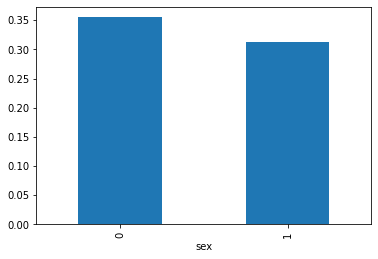

In [613]:
df12.groupby('sex').income.mean().plot(kind='bar')

In [614]:
df12.loc[(df12['sex'] == 0) , 'income'].value_counts()

0    13984
1     7697
Name: income, dtype: int64

In [615]:
df12.loc[(df12['sex'] == 1) , 'income'].value_counts()

0    8670
1    3951
Name: income, dtype: int64

In [616]:
from sklearn.model_selection import train_test_split

In [617]:
from sklearn.linear_model import LogisticRegression

In [618]:
# divide the data set to two subset, one with only male as a sex and the second with only female as a sex
df_men, df_women = [x for _, x in df12.groupby(df12['sex'] == 1 )]

In [619]:
df_men.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21681 entries, 4 to 18097
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   workclass     21681 non-null  int64
 1   education     21681 non-null  int64
 2   marital       21681 non-null  int64
 3   occupation    21681 non-null  int64
 4   relationship  21681 non-null  int64
 5   race          21681 non-null  int64
 6   sex           21681 non-null  int64
 7   income        21681 non-null  int64
dtypes: int64(8)
memory usage: 1.5 MB


In [620]:
df_x_men = pd.DataFrame(np.c_[df_men['relationship'], df_men['education'], df_men['race'],df_men['occupation'],df_men['sex'],df_men['marital'],df_men['workclass']], columns = ['relationship','education','race','occupation','sex','marital','workclass'])
df_y_men = pd.DataFrame(df_men.income)

In [621]:
df_x_women = pd.DataFrame(np.c_[df_women['relationship'], df_women['education'], df_women['race'],df_women['occupation'],df_women['sex'],df_women['marital'],df_women['workclass']], columns = ['relationship','education','race','occupation','sex','marital','workclass'])
df_y_women = pd.DataFrame(df_women.income)

In [622]:
#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
x_train_men, x_test_men, y_train_men, y_test_men = train_test_split(df_x_men, df_y_men, test_size=0.33, random_state=42)

In [623]:
#Initialize the linear regression model
#reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
x_train_women, x_test_women, y_train_women, y_test_women = train_test_split(df_x_women, df_y_women, test_size=0.33, random_state=42)

In [624]:
#Train our model with the training data
reg.fit(x_train_men, y_train_men)
#print our price predictions on our test data
y_pred_men = reg.predict(x_test_men)

In [625]:
#Train our model with the training data
reg.fit(x_train_women, y_train_women)
#print our price predictions on our test data
y_pred_women = reg.predict(x_test_women)

In [626]:
[['relationship','education','race','occupation','gender','marital','workclass']]
reg.predict([[1,7,3,7,0,2,0]])

array([1])

In [627]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_men, y_pred_men))

Accuracy: 0.7122292103424179


In [628]:
print("Accuracy:",metrics.accuracy_score(y_test_women, y_pred_women))

Accuracy: 0.8979591836734694


In [629]:
from sklearn.metrics import classification_report
print(classification_report(y_test_men, y_pred_men))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80      4634
           1       0.66      0.39      0.49      2521

    accuracy                           0.71      7155
   macro avg       0.69      0.64      0.64      7155
weighted avg       0.70      0.71      0.69      7155



In [630]:
print(classification_report(y_test_women, y_pred_women))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2874
           1       0.91      0.75      0.82      1291

    accuracy                           0.90      4165
   macro avg       0.90      0.86      0.87      4165
weighted avg       0.90      0.90      0.90      4165



In [632]:
df12.index = pd.RangeIndex(len(df12.index))

df12.index = range(len(df12.index))

In [633]:
df12.index.is_unique

True

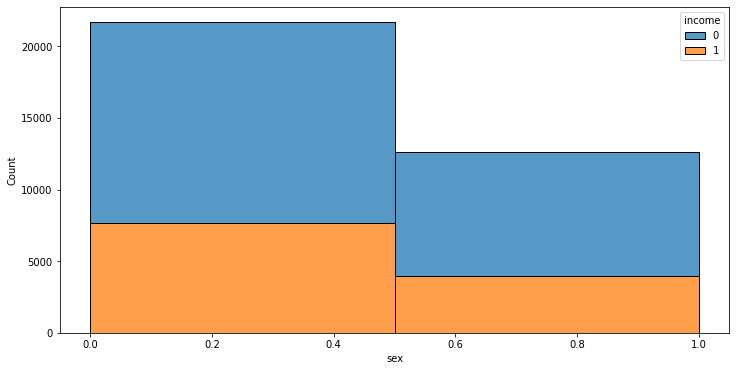

In [635]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix
plt.figure(figsize=(12,6));
sns.histplot(binwidth=0.5, x="sex", hue="income", data=df12, stat="count", multiple="stack");